#  1 - Introduction from linear models

In [83]:
import numpy as np
import matplotlib.pyplot as plt

## Regression problem and linear models

In this notebook we will review the concepts of regression and linear models, and take advantage of this to learn the first steps of gradient descent and training.

For this, we'll try to model a polynomial distribution of one single variable, by taking a number of samples from it. We start by generating these samples and showing you the true distribution - see the `polynomial` function.

NOTE: The seed is what will allows us reproducibility. Do not change it so that you can compare the outputs during this event. Change it afterwards to see that the method works even with different random samples for the distribution.

In [84]:
# Definitions
seed = 42
num_samples = 10


# Polynomial distribution to model
def polynomial(x):
    return x - 0.5 * (x ** 2) + .05 * (x ** 3)

Let's start by generating a few samples, which will be our observations for the following tasks. We add some gaussian noise so they don't fall exactly on top of the distribution but represent it's shape. Run the following cell and look at the shape of the function and its samples.

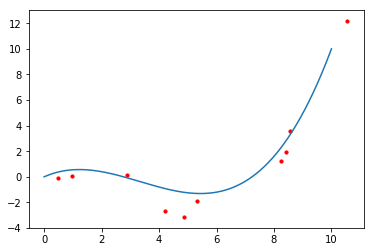

In [85]:
np.random.seed(seed)

# Polynomial distribution 
x = np.linspace(0, 10, 1000)
y = polynomial(x)
plt.plot(x, y)

# Samples 
x_samples = np.linspace(0, 10, 10) + np.random.normal(0, 1, num_samples)
y_samples = polynomial(x_samples) + np.random.normal(0, 1, num_samples)
plt.scatter(x_samples, y_samples, c='r', s=10)
plt.show()

## Defining our linear model

Since we know exactly our model, let's start by trying to obtain an exact solution. We know the number of features we have - 3 - and what they are - $x$, $x^2$ and $x^3$, so our model is defined by:

$$a(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3$$

We can also write it in the following manner

$$a(x) = w_0 + w_1 x_0 + w_2 x_1 + w_3 x_2$$

abstracting away the non-linear characteristic of the features, and you can see that this is a linear model in terms of its parameters, this is, our model is just a linear combination of some input that produces some output.

If we put together all of our samples (x, y), we get:

$$ 
x^T = [\ \ 0.497,\ \ \ 0.973, \  ... ,\  10.543] \\
y^T = [-0.084,\ \ 0.080, \  ... ,\   12.145] \\
$$ 

But for model $a(x)$ we want to define all features  $x_0$, $x_1$ and $x_2$, building a matrix X that is defined as:

\begin{equation*}
X = \begin{bmatrix} 
x_0^0 & x_1^0 & x_2^0 \\
x_0^1 & x_1^1 & x_2^1 \\
... & ... & ...\\
x_0^{n-1} & x_1^{n-1} & x_2^{n-1} \\
\end{bmatrix}
\end{equation*}

Implemente a function below that generates this matrix, expanding your original features $x_0^0$, $x_0^1$, ..., $x_0^{n-1}$ into the matrix X. Add an additional collumn of ones, which will represent our bias factors in the model.

In [86]:
def expand_polynomial(samples, num_features):
    """
        Function to expand a vector of samples into polynomial features
        
        samples - vector of N samples x
        num_features - desired degree of expansion f
        
        The output should be a matrix of size N x f
    """
    
    ### YOUR CODE HERE
    raise Exception('Not implemented')


Test it out below:

In [87]:
dummy_samples = np.array([0.0, 1.0, 2.0])

dummy_expanded_samples = np.array(
    [
        [0.0, 0.0, 0.0, 1.0], 
        [1.0, 1.0, 1.0, 1.0], 
        [2.0, 4.0, 8.0, 1.0]
    ]
)

assert (expand_polynomial(dummy_samples, 3) == dummy_expanded_samples).all()

### Exact solution


Considering $X$ our sample matrix, $w$ as the weight vector, we can define our model as a function $a(x)$ that is computed by the following expression:

$$a(X) = Xw$$

Given that we have labels $y$ that correspond to the output of $a(x)$, the direct solution would be to use all samples to find an "exact" solution, which can be done by using the inverted matrix:

$$w = (X^TX)^{-1}X^Ty$$


Implement it in the cell below.

In [88]:
def compute_exact_solution(x, y):
    """
        Function to compute exact solution of linear problem y = Xw from samples
        x and labels y
    """

    ### YOUR CODE HERE
    raise Exception('Not implemented')


Now let's use your function to get to the distribution. Like we already mentioned, we'll use 3 as the number of features, so we'll use the expansion function above to greate our feature vectors and then we'll compute the output weights

In [94]:
num_features = 3
X_features = expand_polynomial(x_samples, num_features)
w_exact = compute_exact_solution(X_features, y_samples)

Now we'll use both these function and your exact solution to get the weights and plot the following:

- the original distribution
- the samples
- your modeled distribution

We'll define an auxiliar function that, given a set of weights, implements our modeled polynomial function

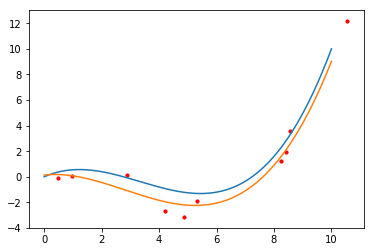

In [95]:
def model_polynomial(x, w):
    """
        Auxiliar function to plot polynomial from samples and weights
        
        Makes use of expansion function to get features
    """
    X_features = expand_polynomial(x, w.shape[0]-1)
    return np.dot(X_features, w)

# Polynomial distribution 
x = np.linspace(0, 10, 1000)
y = polynomial(x)
plt.plot(x, y)

# Samples
plt.scatter(x_samples, y_samples, c='r', s=10)

# Modeled polynomial distribution 
x = np.linspace(0, 10, 1000)
y = model_polynomial(x, w_exact)
plt.plot(x, y)

plt.show()

### Loss functions

So how do we know how well our model adapts to the data?

In this example visualy you can see that it seem to adpata quite well, but in most cases neither you have the true function available, nor is it easy to visualize your data so well. This is why we need to define some function that measures how well we adapt (or not) to the data. We call these error functions or loss function. 

We will use the mean squared error (MSE). This function is defined by the followin expression:

$$L(X, y, w) = \frac{1}{l} || y - Xw ||^2$$

where $X$ is the matrix with the samples, $w$ your weight vector and $y$ the labels. $l$ is the number of samples in the training set. Implement the MSE computation, in the wrapper below that receives two vectors: one with your model predictions and another with the true sample outputs.

In [91]:
def loss_mean_squared_errors(X, w, y_gold):
    """
        Function that compute mean squared errors for weights w for
        pairs of examples (X, y) where X is the feature matrix and y 
        the labels
    """

    ### YOUR CODE HERE
    raise Exception('Not implemented')


Test your function below:

In [100]:
labels = y_samples
features = expand_polynomial(x_samples, w_exact.shape[0]-1)

assert(np.isclose(loss_mean_squared_errors(features, w_exact, labels), 0.43499541611543535))

### Gradient Descent 

Now we will see how to get to a similar solution through learning methods. In this section, you will implement gradient descent, an algorithm to iteratively update the weights according to the direction of the error. For this  we will need a loss function that describes the mentioned error, and that we can optimize over. The iterative process will then update the weights according to

$$ w_{i+1} = w_i - \eta \Delta_w L$$ 

where $\Delta_w L$ is the gradient of your loss function with respect to the weights, $w_{i+1}$ is the updated weight and $w_i$ the curretn weight. We thus need to compute the gradient of our loss function to be able to define this update process.

We'll use the loss function you defined before - the mean squared errors. Notice that the expression you implemented is already adapted to compute the loss over several samples and return the averaged loss. Use the expression below as the $\Delta_w L$:

$$ \Delta_w = \frac{2}{N} X^T (Xw - y) $$


In [114]:
# wrapper for gradient descent implementation
def compute_gradient_mse(X, y, w):
    """
        Compute gradient for mean squared errors loss function with respect to
        weights w
    """

    ### YOUR CODE HERE
    raise Exception('Not implemented')


Below we'll apply your function and update the weights ietratively, at each iteration moving a step closer to the final weights. Run the code below 


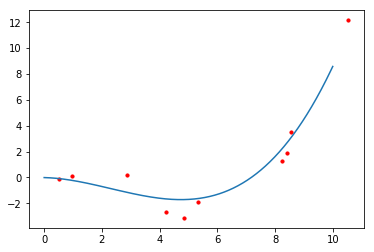

In [112]:
### Definitions 
np.random.seed(seed)
num_iterations = 10000
num_features = 3
eta = .000001    # learning rate
w_gradient = 0.0001 * (0.5 - np.random.rand(num_features + 1))  # initial weights


### Run gradient descent on our examples
X_features = expand_polynomial(x_samples, num_features)
for i in range(num_iterations):
    w_gradient -= eta * compute_gradient_mse(X_features, y_samples, w_gradient)

    
### Plot samples and final distribution 
plt.scatter(x_samples, y_samples, c='r', s=10)
x = np.linspace(0, 10, 1000)
y = model_polynomial(x, w_gradient)
plt.plot(x, y)

Finally, see the error of this model and compare with the exact solution. Vary the number of iterations to see the errors decreasing even more.

In [113]:
print('Exact error: {}'.format(loss_mean_squared_errors(X_features, w_exact, y_samples)))
print('Gradient error: {}'.format(loss_mean_squared_errors(X_features, w, y_samples)))

Exact error: 0.434995416115
Gradient error: 0.726306913746


In this particular problem, we mean to show you that the gradient descent method works well in converging to a solution that's close to an exact one. However, this is obviously not the usecase for the learning methods we mean to teach you. 

Additionally, if you do not pick good initial weights and a good learning rate you won't converge so well to a good solution (try varying those parameters and see for yourself). So it seems too much work for such a simple model. In reality, simply applying the exact solution here is perfectly valid, this was just a simple way for you to get started with the concepts of:

- features;
- weights;
- loss; and
- gradient descent.

However, these methods are very powerfull, as you will see in the following notebooks. They will be particular usefull for examples when our data is not necessarily defined by a linear model or when the number of features/weights is very big. There are also improvements to the gradient descent algorithm that we're not covering here, with some small differences that stabilize the learning rate and improve convergence, but we will leave those for another time.

